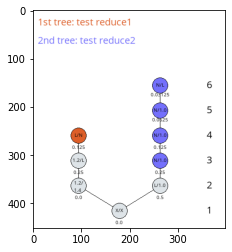

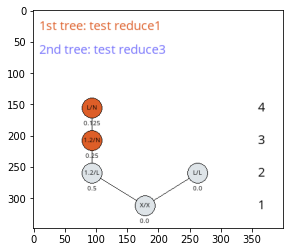

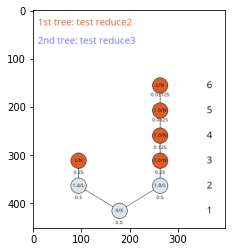

In [6]:
import matplotlib.pyplot as plt

from src.single_tree.development_tree_reader import read_all_trees
from src.single_tree.development_tree_utils import prepare_trees
from src.single_tree.global_params import GlobalParams
from src.view.draw_compared_trees import TreeDrawSettings, TreeDrawer, reduced_node_caption_1, double_node_caption_1, \
    load_font, FONT_PATH, node_dist_caption_2

max_level = 10
param_a = 0.5
is_reducing = False
global_params = GlobalParams(max_level=max_level, param_a=param_a)

draw_settings = TreeDrawSettings(color_left=0xFF285EDD, color_right=0xFFFC7074,
                                 color_eq=0xFFE8E4DE, color_ineq=0xFFE8E4DE,
                                 get_node_caption_1=double_node_caption_1,
                                 get_node_caption_2=node_dist_caption_2,
                                 font=load_font(FONT_PATH, 10),
                                 legend_font=load_font(FONT_PATH, 20),
                                 width=2000, height=720)
tree_drawer = TreeDrawer(draw_settings, global_params)

# read and prepare trees: reduce if necessary, precalculate some parameters
# notice: file names must be "Genus_specie_type.xtg", and it will be shown as "Genus specie"
trees = read_all_trees(pattern="test/test_input/sofa/test_reduce*.xtg", is_test_nodes=True, max_level=max_level)
#trees = read_all_trees(pattern="test/test_input/paper_m/M2_*.xtg", is_test_nodes=True)
#trees = read_all_trees(pattern="test/test_input/test_reduce*.xtg", is_test_nodes=True)
trees = sorted(list(trees), key=lambda x: x.name)
prepare_trees(trees, max_level, is_reducing=is_reducing, use_min_common_depth=False, use_flipping=False)

# get N*(N-1) tree pairs, superimpose and draw
for i in range(0, len(trees)):
    for j in range(i + 1, len(trees)):
        im = tree_drawer.draw_tree(trees[i], trees[j], "")
        plt.imshow(im)
        plt.show()
